<a href="https://colab.research.google.com/github/ahmadSum1/MIR_Machine_Learning_PARIS_Sebastien/blob/dev_class1/MIRs1_ML_Exercice1_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [153]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial import Voronoi, voronoi_plot_2d

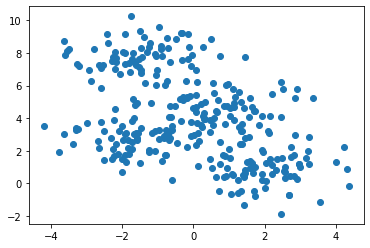

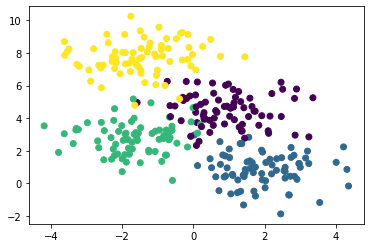

In [154]:
X, y= make_blobs(n_samples=300, centers=4, n_features=2, random_state=0)
# plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.figure(1)
plt.scatter(X[:,0], X[:,1])
plt.figure(2)
plt.scatter(X[:,0], X[:,1], c=y)

**Task 1**  [Minkowski Distance](https://arifromadhan19.medium.com/understanding-clustering-in-unsupervised-learning-b0d7a5f61f03)

In [155]:
def  calc_Lq(x1 , x2 , q):
  return (np.sum((np.abs(x1-x2))**q))**(1/q)

VARIFY Task 1

In [156]:
X1 = np.array(X[0,:])
X2 = np.array(X[1,:])

calc_Lq(X1,X2,2)

4.442211434485271




**Task 2: Assign the each point to the nearest cluster**  

In [157]:
def update_assignation(X,U,q):
  A = []
  for i in range(X.shape[0]):
    k = U.shape[0]
    dist = np.zeros(k)
    # print(dist)
    for j in range(k):
      # print (i,j,X[i,:],U[j,:])
      dist[j] = calc_Lq(X[i,:],U[j,:],q)
    c = np.argmin(dist)
    # print(c, dist)
    A.append(c)
  return np.asarray(A)

VARIFY Task 2

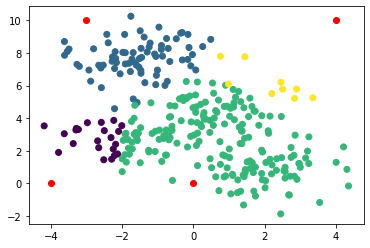

In [158]:
U = np.array([[-4.0, 0.0],
              [-3.0, 10.0],
              [0.0, 0.0],
              [4.0, 10.0]])
a1 = update_assignation(X,U,1)
# plt.scatter(X[:,0], X[:,1], c=a1)
plt.figure(1)
plt.scatter(U[:,0], U[:,1], color="red")
# plt.figure(2)
plt.scatter(X[:,0], X[:,1], c=a1)

**Task 3 update centroid**

In [159]:
def update_centroid(X,a,K):
  d= X.shape[1]
  U = np.zeros((K,d))
  counts = np.zeros(K)
  for i in range(X.shape[0]):
    for j in range(K):
      if j==a[i]:
        U[j,:]+=X[i,:]
        counts[j] +=1
  counts = counts.reshape(K,1)
  return U/counts

**varify task 3**

[[-2.74398284  2.7572005 ]
 [-1.56026379  7.67032787]
 [ 0.71981595  2.5771521 ]
 [ 2.16448085  6.15149427]]


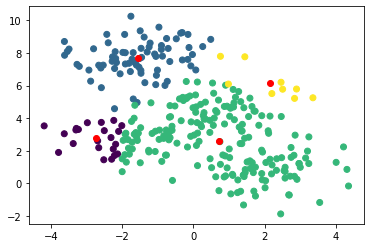

In [160]:
U1 = update_centroid(X, a1, 4)
print (U1)
plt.figure(1)
# plt.figure(2)
plt.scatter(X[:,0], X[:,1], c=a1)

plt.scatter(U1[:,0], U1[:,1], color="red")

**Task 4 compute loss**
(Inertia)

calculates the sum of distances of all the points within a cluster from the centroid of that cluster.

In [161]:
def  compute_Kmeans_loss(X,U,a,q):
    loss = 0
    for k in range(U.shape[0]):
        for i in range(X.shape[0]):
            if k==a[i]:
                loss += calc_Lq(X[i], U[k], q)
    return loss

**varify Task 4**

In [162]:
compute_Kmeans_loss(X, U1, a1, 2)

546.2381343343799

**Task 5**

Write the main function *myKmeans(X,K,q,T)* where K is the number of centroids, q the Lq norm parameter and T the number of iteration. You will have to sample the initial value of your centroid (U matrix).

Please sample K indexes from the set 0,...,n-1 without replacement. Plot the loss function versus iteration. How is the convergence ?. Check the impact of q.

In [163]:
def myKmeans(X,K,q,T):
    U = X[:K,:]
    a=[]
    loss = np.zeros(T)
    for t in range(T):
        a = update_assignation(X, U, q)
        U = update_centroid(X, a, K)
        loss[t] += (compute_Kmeans_loss(X, U, a, q))
    return U, a, loss
    

*test Task 5*

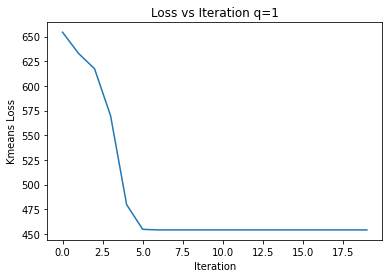

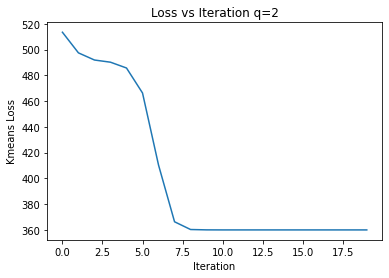

In [164]:
U1, a1, l1 = myKmeans(X,4,1,20)
plt.figure()  
plt.title("Loss vs Iteration"+" q=1") 
plt.xlabel("Iteration") 
plt.ylabel("Kmeans Loss") 
plt.plot( l1)
plt.show()

U2, a2, l2 = myKmeans(X,4,2,20)
plt.figure()  
plt.title("Loss vs Iteration"+" q=2") 
plt.xlabel("Iteration") 
plt.ylabel("Kmeans Loss") 
plt.plot( l2)
plt.show()


**task 6**

 Run your myKmeans(X,K,q,T) on X with K=4, T=20 and q=2. For each iteration, plot the data, the updated centroid and the voronoi diagram.

In [165]:
def myKmeans1(X,K,q,T):
    U = X[:K,:]
    plt.figure(0)
    plt.title("Before clustering")
    plt.scatter(X[:,0], X[:,1])
    plt.scatter(U[:,0], U[:,1], color="red")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlim([-5, 5])
    plt.ylim([0, 10])
    plt.show()
    a=[]
    loss = np.zeros(T)
    for t in range(T):
        a = update_assignation(X, U, q)
        U = update_centroid(X, a, K)
        loss[t] += (compute_Kmeans_loss(X, U, a, q))
        #print
        vor = Voronoi(U)
        fig, ax = plt.subplots()
        plt.figure(t+1)
        plt.title("Iteration: "+str(t+1)+", loss: "+str(loss[t])) 
        plt.scatter(X[:,0], X[:,1], c=a)
        plt.scatter(U[:,0], U[:,1], color="red")
        plt.gca().set_aspect('equal', adjustable='box')
        voronoi_plot_2d(vor, show_vertices =False, show_points =False, ax=ax)
        plt.xlim([-5, 5])
        plt.ylim([0, 10])
        
    plt.show()
    # return U, a, loss
    

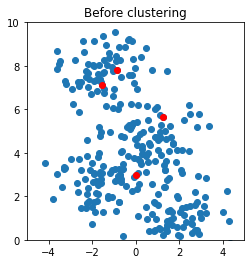

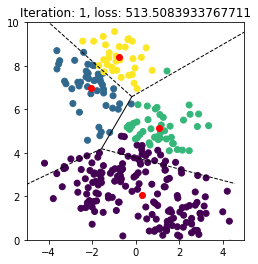

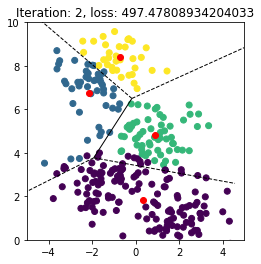

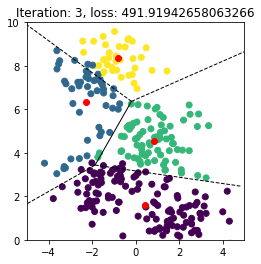

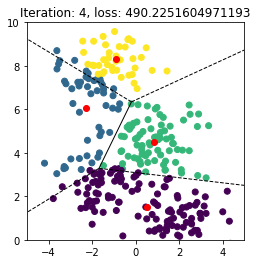

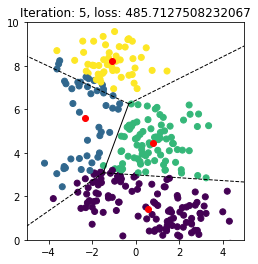

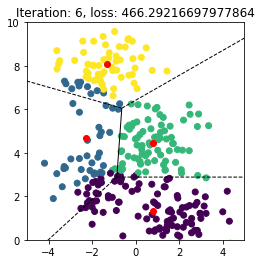

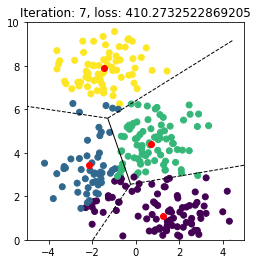

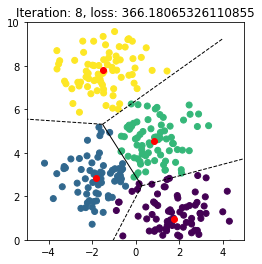

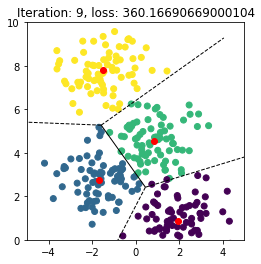

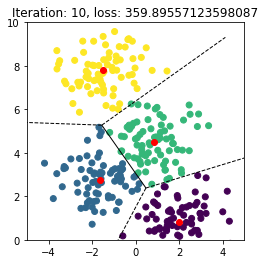

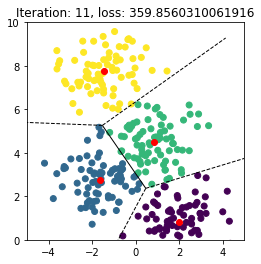

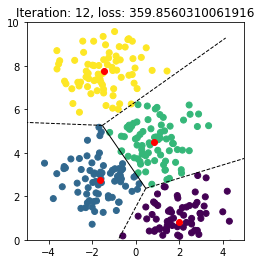

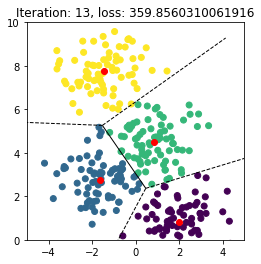

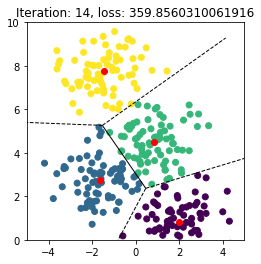

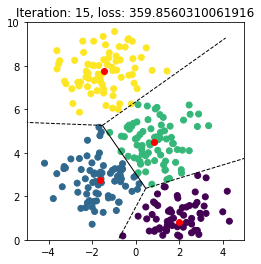

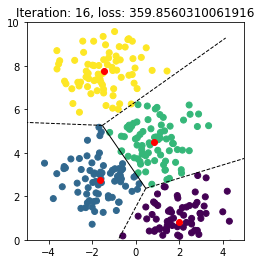

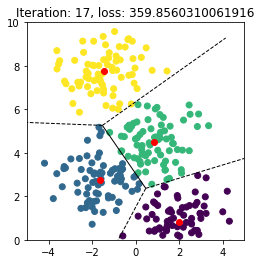

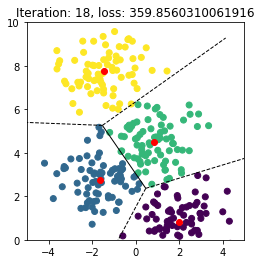

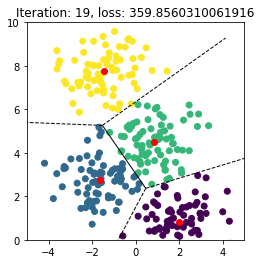

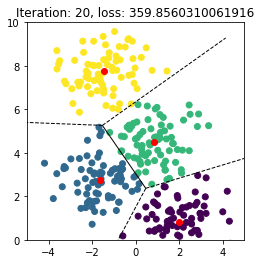

In [166]:
myKmeans1(X,4,2,20)

**Task 7**

With a maximum Kmax = 30, find the estimated K minimizing the BIC criteria. Plot versus k=2;...,Kmax, the BIC criteria


In [167]:
def  compute_SSE(X,U,a):
    sse = 0
    for k in range(U.shape[0]):
        for i in range(X.shape[0]):
            if k==a[i]:
                sse += (calc_Lq(X[i], U[k], 2))**2
    return sse

In [168]:
def compute_BIC(SSE,d,n,k):
    BIC=(n*np.log(np.sqrt(SSE)/n)+k*(d+1)*np.log(n)) 
    return BIC

In [169]:
def estimate_K(X, K, P, T):
  BICmean = np.zeros(K)
  for k in range(2, K):
    BIC =  np.zeros(P)
    for p in range(P):
      U,a,l = myKmeans(X, k, 2, T)
      SSE = compute_SSE(X, U, a)
      BIC[p] = compute_BIC(SSE, X.shape[1], X.shape[0], k)
    # print(BIC)
    BICmean[k] = np.mean(BIC)
  # print(BICmean)
  K_ = np.argmin(BICmean)

  print(K_)
  fig, ax = plt.subplots()
  ax.plot(BICmean)
  ax.axvline(x=K_, color='red')
  plt.show()



8


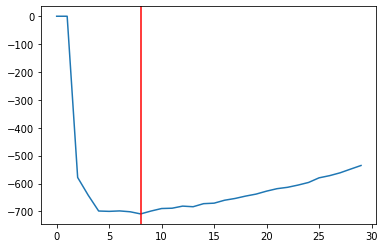

In [170]:
estimate_K(X, K=30, P=5, T=10)